# Overview

By means of Google News it was possible to fetch a unspecify amount of news related to a couple of words written by any person who happens to execute the script `main.py` 

In [66]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("./assets/news.csv")

display(df)

,period,title
0,2022-03-08,Bolsonaro diz a evangélicos que dirige o país ...
1,2022-03-23,Comentário do Dia: Pequenas (e algumas nem tão...
2,2022-02-23,Bolsonaro critica PT por invasão de igreja e c...
3,2022-02-25,Governo Bolsonaro assedia pastores para evitar...
4,2022-03-04,O que explica o ainda forte apoio dos evangéli...
...,...,...
64,2021-06-05,Guerra política na igreja da paz: a perseguiçã...
65,2021-06-02,Bolsonaro fala em acabar com taxa para igrejas...
66,2022-01-04,"""É difícil dizer que Bolsonaro é um bom católi..."
67,2021-07-03,"""Há um conjunto de cristãos que não apoia inic..."


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   period  69 non-null     object
 1   title   69 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


## Data handling

How one can see, periods are represented by `object` type. However, we wish they turn into `date` type. In order to accomplish this, we can use a Pandas' method which does such conversion. 

In [68]:
df["period"] = pd.to_datetime(df["period"])

It's also intersting to have extra columns such as month and year assigned to each period. Thus, we make use of DataFrame attributes to fetch these two values.

In [69]:
# Mapping
months_mapping = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}

df["month"] = df["period"].dt.month.map(months_mapping)
df["year"] = df["period"].dt.year

df

,period,title,month,year
0,2022-03-08,Bolsonaro diz a evangélicos que dirige o país ...,March,2022
1,2022-03-23,Comentário do Dia: Pequenas (e algumas nem tão...,March,2022
2,2022-02-23,Bolsonaro critica PT por invasão de igreja e c...,February,2022
3,2022-02-25,Governo Bolsonaro assedia pastores para evitar...,February,2022
4,2022-03-04,O que explica o ainda forte apoio dos evangéli...,March,2022
...,...,...,...,...
64,2021-06-05,Guerra política na igreja da paz: a perseguiçã...,June,2021
65,2021-06-02,Bolsonaro fala em acabar com taxa para igrejas...,June,2021
66,2022-01-04,"""É difícil dizer que Bolsonaro é um bom católi...",January,2022
67,2021-07-03,"""Há um conjunto de cristãos que não apoia inic...",July,2021


## Insights

Below, one might see how many news were published on each month of the currently year

In [70]:
currently_year = 2022

df[df.year == 2022]["month"].value_counts()

February    13
January      6
March        5
Name: month, dtype: int64

In adiction to that, a chart with how many ones were published by year

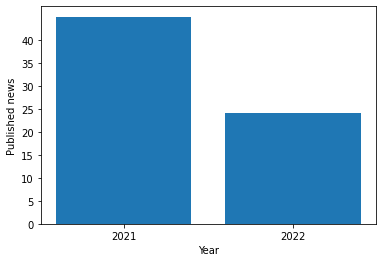

In [71]:
# axis-x year
# axis-y amount

counts = df["year"].value_counts()

df_news_by_year = pd.DataFrame(counts)
df_news_by_year = df_news_by_year.reset_index()
df_news_by_year.columns = ["year", "amount"]
df_news_by_year

plt.bar(df_news_by_year["year"], df_news_by_year["amount"])

plt.xticks(np.arange(2021,2023,1))
plt.yticks(np.arange(0,45, 5))

plt.ylabel("Published news")
plt.xlabel("Year")

plt.show()